# Why Scikit-learn
* Built on Numpy and Matplotlib (and Python)
* Has many in-built machine-learning models
* Methods to evaluate your machine learning models
* Very well designed API


Shift+Tab to view docstring

## Introduction to Scikit-Learn

### An end-to-end Scikit-Learn workflow

_Note: If you have structured data, use *ensemble methods*_


_If you have unstructured data, use *deep learning or transfer learning*_

In [222]:
#Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline #so plots are in the notebook

UsageError: unrecognized arguments: #so plots are in the notebook


In [124]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [125]:
#Check Python versions
import sklearn
sklearn.show_versions()


System:
    python: 3.7.4 (default, Aug 13 2019, 15:17:50)  [Clang 4.0.1 (tags/RELEASE_401/final)]
executable: /Applications/anaconda3/bin/python
   machine: Darwin-19.3.0-x86_64-i386-64bit

Python deps:
       pip: 19.2.3
setuptools: 41.4.0
   sklearn: 0.21.3
     numpy: 1.17.2
     scipy: 1.3.1
    Cython: 0.29.13
    pandas: 0.25.1


In [15]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y labels
y = heart_disease['target']

In [16]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3


In [20]:
#Predict y
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [21]:
y_test

282    0
158    1
122    1
235    0
267    0
      ..
19     1
227    0
171    0
181    0
164    1
Name: target, Length: 61, dtype: int64

In [22]:
# Evaluate the model
clf.score(X_train, y_train)  #Mean accuracy score for train data

1.0

In [23]:
clf.score(X_test, y_test)

0.8032786885245902

In [24]:
#Ignore warnings when they are not needed
#import warnings
#warnings.filterwarnings('ignore') #ignore warnings
#warnings.filterwarnings('default') #get the warnings back

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [26]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 5, 29]])

In [27]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [28]:
# Improve the model with a different estimator
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf= RandomForestClassifier(n_estimators =i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:2f}%')
    print('')   #20 estmators is best for accuracy

Trying model with 10 estimators...
Model accuracy on test set: 83.606557%

Trying model with 20 estimators...
Model accuracy on test set: 83.606557%

Trying model with 30 estimators...
Model accuracy on test set: 81.967213%

Trying model with 40 estimators...
Model accuracy on test set: 85.245902%

Trying model with 50 estimators...
Model accuracy on test set: 80.327869%

Trying model with 60 estimators...
Model accuracy on test set: 83.606557%

Trying model with 70 estimators...
Model accuracy on test set: 81.967213%

Trying model with 80 estimators...
Model accuracy on test set: 83.606557%

Trying model with 90 estimators...
Model accuracy on test set: 83.606557%



In [29]:
# Save a model and use it
import pickle

pickle.dump(clf,open('random_forest_model_1.pk1', 'wb'))

In [30]:
#Using a saved model to make predictions on new dataset

loaded_model = pickle.load(open('random_forest_model_1.pk1', 'rb'))
loaded_model.score(X_test, y_test)

0.8360655737704918

In [31]:
X = heart_disease.drop('target', axis=1)  #X is every column except target
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
## Split data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [35]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
len(car_sales)

1000

In [37]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [38]:
## Split data into X/y
X = car_sales.drop('Price', axis = 1)
y= car_sales['Price']

## Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
## Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [41]:
## Alternatively
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
## Build machine learning model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(100)

X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
model.score(X_test, y_test)

0.3235867221569877

### Dealing with missing values

In [44]:
## Import car-sales-missing-data

car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
len(car_sales_missing)

1000

In [45]:
#Check for missing values
car_sales_missing.isna().sum()  

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Filling missing values with Pandas

In [46]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer (KM) column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column with default value of 4
car_sales_missing['Doors'].fillna(4, inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# For the Price, remove rows with missing values
car_sales_missing.dropna(inplace=True)
len(car_sales_missing) #we lose 50 obs

950

In [49]:
## Create X and y
X = car_sales_missing.drop('Price', axis = 1)
y=car_sales_missing['Price']

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Filling missing data with Scikit learn

In [51]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_missing.isna().sum()  #checking for missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# Remove NA rows in the Price columns
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()  #check current missing values

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# Split into X and y
X = car_sales_missing.drop('Price', axis= 1)
y = car_sales_missing['Price']

In [55]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer  #import SimpleImputer class
from sklearn.compose import ColumnTransformer  #import ColumnTransformer class

## Define imputers
###Using the SimpleImputer class, when constant, fill_value
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)  #all NAs should be 4 
num_imputer = SimpleImputer(strategy='mean')   #all NAs should be their mean

#Define columns we want to impute
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features), #'cat_imputer' will use cat_imputer on cat_features
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [57]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [58]:
car_sales_filled.isna().sum()  #Now no missing values

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
# Import OneHotEncoder class from sklearn to create dummies
from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [60]:
## Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## Choosing the right estimator/algorithm
Different estimators are better suited for different types of data and different problems

### Picking a machine learning model for a regression problem

In [61]:
#Import Boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [62]:
# Boston is a dictionary so we turn it into a dataframe
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
len(boston_df)

506

## Ridge Regression model

In [64]:
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
X=boston_df.drop('target', axis=1)
y=boston_df['target']

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the Ridge model on the test data
model.score(X_test, y_test) #returns the R2 of the prediction

0.6662221670168522

## Random Forest
This is under the Ensemble Methods....How do we improve on the Ridge regression?

In [65]:
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantate Ridge model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#Check the score of the Ridge model on test data
rf.score(X_test, y_test)

0.873969014117403

## Classification model

In [66]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

### Linear SVC Model

In [68]:
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to data (training the machine learning model)
clf.fit(X_train, y_train)

#Evaluate the model (use patterns the model has learned)
clf.score(X_test, y_test)  #Huge improvement

0.8524590163934426

###### Fitting the model to a data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variable

In [70]:
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test) 

0.8524590163934426

### Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [71]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


#### Using `predict ()`

In [72]:
# 1. Observing manually
clf.predict(X_test) #Predicted y

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [73]:
np.array(y_test) #True y

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
# 2. Using numpy array to compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)  #we achieve accuracy of 85%

0.8524590163934426

In [75]:
# 3. Using sklearn to predict
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Using `predict_proba ()`
Predicts based on probability

In [76]:
clf.predict_proba(X_test[:5])
#first 5 rows, the left probs are the probs of being a 0, while the right probs are probs of being 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### Regression models

In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop('target', axis =1)
y = boston_df['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate and fit model
model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [79]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [80]:
# Compare the predictions to the actual
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
#Result means, on average,we predict 2.122 from the actual

2.1226372549019623

#### Evaluating a machine learning model

In [81]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 1. Evaluating a model with the Estimator score method

In [83]:
clf.score(X_train, y_train)

1.0

In [84]:
clf.score(X_test, y_test)  #In classification, it returns the mean accuracy

0.8524590163934426

In [85]:
#Let's do the same for regression

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = boston_df.drop('target', axis =1)
y = boston_df['target']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate and fit model
model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)

In [86]:
model.score(X_test, y_test)  #In regression, it returns the R square by default

0.873969014117403

### 2. Evaluating a model with the scoring parameter

In [101]:
#Cross_val_score creates many different splits and the model is validated on all data
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train);

In [90]:
clf.score(X_test, y_test)

0.8524590163934426

In [93]:
cross_val_score(clf, X, y, cv=5)  #5 different splits

array([0.81967213, 0.86885246, 0.80327869, 0.85      , 0.76666667])

In [95]:
#Default scoring paramer of classifier = mean accuracy
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

#Compare two scores
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### Classification Model Evaluation Metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [126]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [127]:
np.mean(cross_val_score)

0.8215300546448088

In [128]:
print(f'Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score) *100:.2f}%')

Heart Disease Classifier Cross-validated Accuracy: 82.15%


#### Area under the Receiver Operating Characteristics (ROC)/Area Under Curve (AUC) curve

ROC curves are a comparison of a model's true positives rate (tpr) versus a model's false positive rate (fpr)
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model redicts 0 when truth is 1

In [129]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.94, 0.06],
        [0.42, 0.58],
        [0.51, 0.49],
        [0.89, 0.11],
        [0.23, 0.77],
        [0.16, 0.84],
        [0.25, 0.75],
        [0.96, 0.04],
        [0.98, 0.02],
        [0.51, 0.49]]), 61)

In [130]:
y_probs_positive = y_probs[:,1] # we want only column 1 of the prob array
y_probs_positive[:10]

array([0.06, 0.58, 0.49, 0.11, 0.77, 0.84, 0.75, 0.04, 0.02, 0.49])

In [131]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

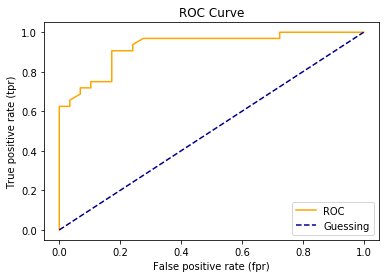

In [132]:
# Create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model
    '''
    #Plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label='ROC')
    
    #Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    #Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [133]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

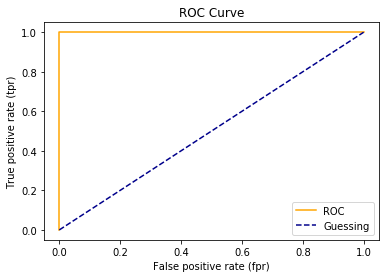

In [117]:
# Plot perfect ROC and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [134]:
# Perfect AUC score (not possible in reality)
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix
It is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, it gives you as an idea of where the model is getting confused.

In [135]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [136]:
# Visualize confusion matrix with pd.crosstabs()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


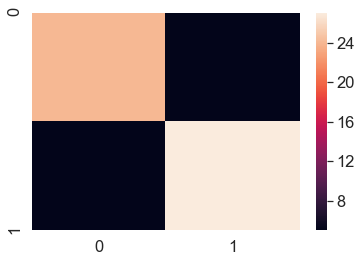

In [139]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

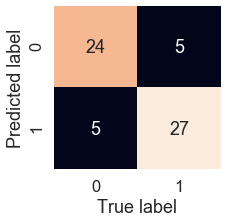

In [141]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using seaborn's heatmap().

    '''
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
    #Fix the broken annotations (this happened in matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5);
    
plot_conf_mat(conf_mat)

#### Classification report

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [146]:
#Where precision and recall become valuable
#In the following, we have 10000 zeros and 1 one. Precision makes us see that the model doesn't predict perfectly
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics

1. R^2
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)


**R^2

In [148]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [149]:
model.score(X_test, y_test)

0.873969014117403

In [150]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [153]:
y_test.mean()

21.488235294117654

In [154]:
r2_score(y_test, y_test_mean)  #r2 is 0

2.220446049250313e-16

#### Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [160]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae #On the average, every prediction is about 2.12 from the actual

2.1226372549019623

In [159]:
#Create a dataframe to view it better
df = pd.DataFrame(data = {'actual values': y_test, 'predicted values': y_preds})
df['differences'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,-3.134
72,22.8,23.467,-0.667
452,16.1,16.853,-0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,-2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


#### Mean Square Error (MSE)

In [163]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse  #mse > mae always

9.242328990196082

In [166]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean() #Use mse when bigger errors are bigger than smaller errors

9.24232899019608

### 2. Using the `scoring` parameter

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [168]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [170]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [172]:
#Accuracy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [173]:
#Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring= 'precision')
np.mean(cv_precision)

0.8085601538512754

In [174]:
#Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring= 'recall')
np.mean(cv_recall)

0.8424242424242424

In [175]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.841476533416832

In [177]:
# How about our regression model?
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor(n_estimators=100)

In [179]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2

In [184]:
#Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring = 'neg_mean_absolute_error')
np.mean(cv_mae)

-3.1068354300135885

In [183]:
#Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(cv_mse)

-21.507177393321676

### 3. Using different evaluation metrics as Scikit-learn functions

In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Make some predictions
y_preds = clf.predict(X_test)

#Evaluate the classfier
print(f'Classifier metrics on test set:')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metrics on test set:
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


#### Regression evaluation functions

In [189]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

#Make some predictions
y_preds = model.predict(X_test)

#Evaluate the regression model
print(f'Regression model metrics on test set:')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on test set:
R^2: 0.5106393318965518
MAE: 0.23754098360655734
MSE: 0.12204426229508197


## Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
    * Could we collect more data? (Generally, the more data, the better)
    * Could we improve our data?
    
From a model perspective:
    * Is there a better model?
    * Could we improve the current model?

**Parameters vs Hyperparameters**
 * Parameters = model find these patterns in data
 * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

#### Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [192]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Tuning hyperparameters by hand

#We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [208]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification.
    '''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)
    }
    print(f'Acc: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [209]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split data into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y= heart_disease_shuffled['target']

#Split data into train, validation, and test sets
train_split = round(0.7 *len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 *len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

#len(X_train), len(X_valid), len(X_test) to check length

clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

#Make predictions
y_preds = clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [211]:
#we only change the n_estimators to 100
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

#Make predictions
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd Classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### Hyperparameter tuning with RandomizedSearchCV

In [213]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,1200],
       'max_depth': [None, 5, 10, 20,30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

np.random.seed(42)

#Split into X and y
X=heart_disease_shuffled.drop('target', axis=1)
y=heart_disease_shuffled['target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)  #n_jobs is how much of computer processing power to dedicate to the model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.4s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [214]:
# best result
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [215]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### Hyperparameter tuning with GridSearchCV
* Goes through every single kind of combination

In [216]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [217]:
#We choose the grid based on the best result from the RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

grid_2 = {'n_estimators': [100,200,500],
       'max_depth': [None],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [6],
       'min_samples_leaf': [1,2]}

#Split into X and y
X=heart_disease_shuffled.drop('target', axis=1)
y=heart_disease_shuffled['target']

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)  #n_jobs is how much of computer processing power to dedicate to the model

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   31.2s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [218]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [219]:
gs_y_preds = gs_clf.predict(X_test)

#Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


#### let's compare models

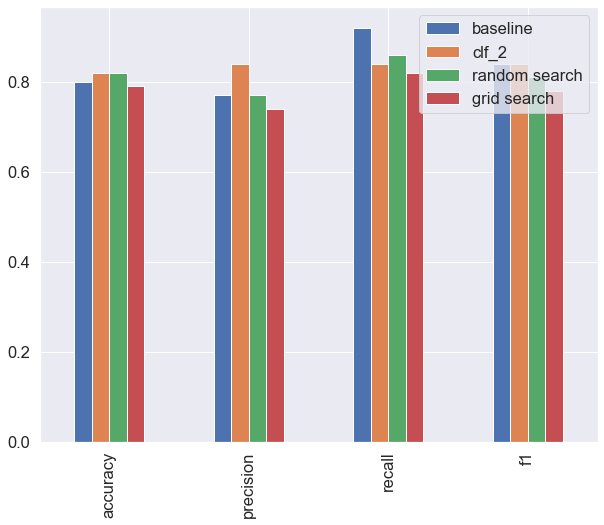

In [225]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

### Two ways to save and load machine learning models
* With Python's `Pickle` module
* With the `joblib` module

#### Pickle

In [226]:
import pickle

#Save an existing model to file
#wb means write binary
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))  #This saves the file to the working directory

In [227]:
# Loading a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [228]:
#Make some predictions from the loaded data 
pickle_y_preds = loaded_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 98.36%
Precision: 0.97
Recall: 1.00
F1 score: 0.98


{'accuracy': 0.98, 'precision': 0.97, 'recall': 1.0, 'f1': 0.98}

#### Joblib
* Use joblib when the model is large

In [230]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename='gs_random_forest_model_2.joblib')

['gs_random_forest_model_2.joblib']

In [231]:
# Loading a saved model
loaded_joblib_model = load(filename = 'gs_random_forest_model_2.joblib')

In [232]:
#Make some predictions from the loaded data 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## Putting all together

In [236]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [235]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [237]:
data.isna().sum()  #sum of missing data

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [247]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

#Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
door_feature=['Doors']
door_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=4))
    ])
    
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
    
#Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transformer, numeric_features)])
    
#Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100))])
    
#Split data
X = data.drop('Price', axis =1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

it is possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [251]:
#Use GridSearchCV with our Regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.5s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [252]:
gs_model.score(X_test, y_test)

0.3339554263158365